In [5]:
import numpy as np
import scipy.signal
import scipy.fft
import matplotlib.pyplot as plt

In [10]:
N_gen = 8192

# Generate white noise and filter it to give it an interesting PSD
w = np.random.normal(0, 1, (N_gen,))
x = scipy.signal.filtfilt(np.array([1, -2, -3, -4, 5]), np.array([1]), w) + 2

# Find PSD using built-in function and manually:
# Built-in function
f, P = scipy.signal.periodogram(x, 1, 'boxcar', nfft=8192, detrend=False)

# Manually
N = len(x)
X = scipy.fft.fft(x) / np.sqrt(8192) * np.sqrt(2)
P_fft = np.abs(X*np.conj(X))
P_fft_one_sided = P_fft[0:int(N/2)+1]  # P_fft_one_sided is identical to P
P_fft_one_sided[0] = P_fft_one_sided[0] / 2
P_fft_one_sided[-1] = P_fft_one_sided[-1] / 2
print(np.allclose(P, P_fft_one_sided))  # True, P matches P_fft_one_sided


# Now undo the manual operation of P_fft_one_sided to get back to a time series, insert your PSD here
N_P = len(P_fft_one_sided)  # Length of PSD
N = 2*(N_P - 1)

# Because P includes both DC and Nyquist (N/2+1), P_fft must have 2*(N_P-1) elements
P_fft_one_sided[0] = P_fft_one_sided[0] * 2
P_fft_one_sided[-1] = P_fft_one_sided[-1] * 2
P_fft_new = np.zeros((N,), dtype=complex)
P_fft_new[0:int(N/2)+1] = P_fft_one_sided
P_fft_new[int(N/2)+1:] = P_fft_one_sided[-2:0:-1]
print(len(P_fft_new))
X_new = np.sqrt(P_fft_new)

# Create random phases for all FFT terms other than DC and Nyquist
phases = np.random.uniform(0, 2*np.pi, (int(N/2),))

# Ensure X_new has complex conjugate symmetry
X_new[1:int(N/2)+1] = X_new[1:int(N/2)+1] * np.exp(2j*phases)
X_new[int(N/2):] = X_new[int(N/2):] * np.exp(-2j*phases[::-1])
X_new = X_new * np.sqrt(8192) / np.sqrt(2)

# This is the new time series with a given PSD
x_new = np.real(scipy.fft.ifft(X_new))

# Verify that P matches P_new
f_new, P_new = scipy.signal.periodogram(x_new, 1, 'boxcar', nfft=8192, detrend=False)
print(np.allclose(P, P_new))  # True, P matches P_new

True
8192
True


In [16]:
# Return values for a gaussian shaped PSD
def gaussian_PSD(f, f0=0, sigma=1, A=1):
    return A * np.exp(-((f - f0) ** 2) / (2 * sigma**2))

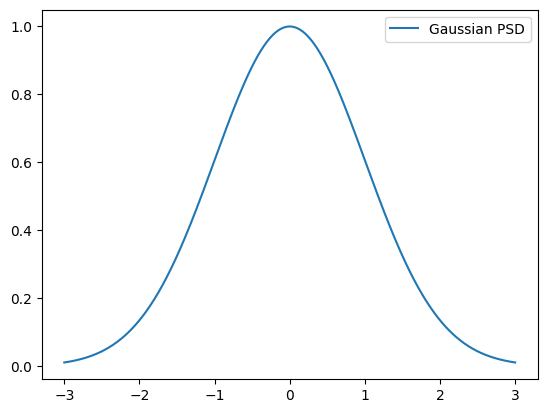

In [21]:
# Plot PSD
plt.figure()
plt.plot(np.linspace(-3, 3, 1000), gaussian_PSD(f, f0=0, sigma=1, A=1), label='Gaussian PSD')
plt.legend()
plt.show()

50
50


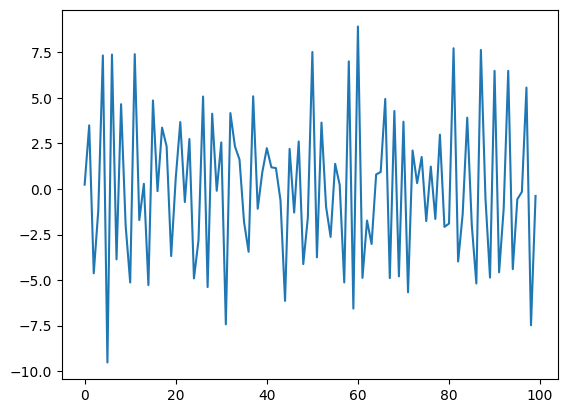

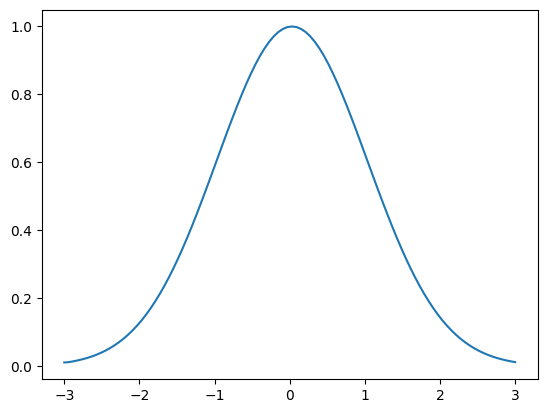

In [50]:
num_of_points = 100
psd = gaussian_PSD(np.linspace(-3, 3, num_of_points), f0=0, sigma=1, A=1)

X_new = np.sqrt(psd).astype(complex)

# Create random phases for all FFT terms other than DC and Nyquist
phases = np.random.uniform(0, 2 * np.pi, (int(num_of_points / 2),))

# Ensure X_new has complex conjugate symmetry
X_new[1 : int(num_of_points / 2) + 1] = X_new[
    1 : int(num_of_points / 2) + 1
] * np.exp(2j * phases)
print(len(X_new[1 : int(num_of_points / 2) + 1]))
X_new[int(num_of_points / 2) :] = X_new[int(num_of_points / 2) :] * np.exp(
    -2j * phases[::-1]
)
print(len(X_new[int(num_of_points / 2) :]))
X_new = X_new * np.sqrt(8192) / np.sqrt(2)

# This is the new time series with a given PSD
x_new = np.real(scipy.fft.ifft(X_new))

# plot the new time series
plt.figure()
plt.plot(x_new)
plt.show()

# Fourier transform of the new time series
X_new = scipy.fft.fft(x_new) / np.sqrt(8192) * np.sqrt(2)

# PSD of the new time series
P_new = np.abs(X_new * np.conj(X_new))

# plot the PSD of the new time series
plt.figure()
plt.plot(np.linspace(-3, 3, num_of_points), P_new)
plt.show()

/tmp/ipykernel_528/1858793515.py:46: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  * quad(lambda t: NoiseValues[int(t / deltaT)], 0, t)[0]
/tmp/ipykernel_528/1858793515.py:46: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  * quad(lambda t: NoiseValues[int(t / deltaT)], 0, t)[0]


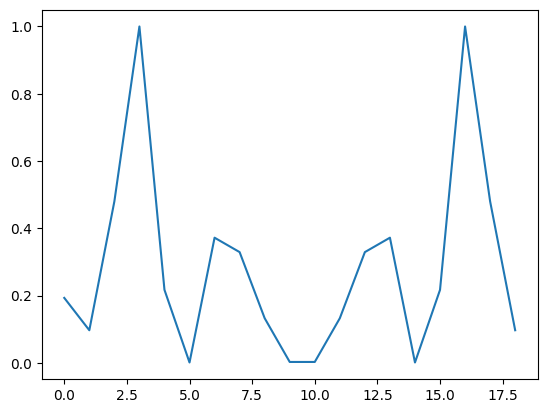

In [39]:
# Simulating qubit dynamics with noise
from scipy.integrate import quad

NumOfExperiments = 10
QubitStartingRho01Value = 1
QubitFrequency = 2
QubitNoiseAmplitudeOfNoise = 3
QubitTotalMeasurementTime = 10
number_of_measurements = 10
timeValues = np.linspace(0, QubitTotalMeasurementTime, number_of_measurements)
deltaT = timeValues[1] - timeValues[0]


def gaussian_PSD(f, f0=0, sigma=1, A=1):
    return A * np.exp(-((f - f0) ** 2) / (2 * sigma**2))


def noise_time_series(num_of_points):
    psd = gaussian_PSD(np.linspace(-3, 3, num_of_points), f0=0, sigma=1, A=1)
    X_new = np.sqrt(psd).astype(complex)
    phases = np.random.uniform(0, 2 * np.pi, (int(num_of_points / 2),))
    X_new[1 : int(num_of_points / 2) + 1] = X_new[
        1 : int(num_of_points / 2) + 1
    ] * np.exp(2j * phases)
    X_new[int(num_of_points / 2) :] = X_new[int(num_of_points / 2) :] * np.exp(
        -2j * phases[::-1]
    )

    X_new = X_new * np.sqrt(8192) / np.sqrt(2)
    return np.real(scipy.fft.ifft(X_new))


def raw_rho01_values(
    t,
    QubitStartingRho01Value,
    QubitFrequency,
    QubitNoiseAmplitudeOfNoise,
    QubitTotalMeasurementTime,
    NoiseValues,
):
    return QubitStartingRho01Value * np.exp(
        -1j
        * (
            QubitFrequency * t
            + QubitNoiseAmplitudeOfNoise
            * quad(lambda t: NoiseValues[int(t / deltaT)], 0, t)[0]
        )
    )


RawExperimentRho01Values = [
    [
        raw_rho01_values(
            t,
            QubitStartingRho01Value,
            QubitFrequency,
            QubitNoiseAmplitudeOfNoise,
            QubitTotalMeasurementTime,
            NoiseValues,
        )
        for t in timeValues
    ]
    for NoiseValues in [
        noise_time_series(num_of_points=number_of_measurements)
        for k in range(NumOfExperiments)
    ]
]

mean_rho01_values = np.mean(RawExperimentRho01Values, axis=0)
abs_rho01_values = np.abs(mean_rho01_values)
first_rho01_value = abs_rho01_values[0]
positive_coherence_values = abs_rho01_values / first_rho01_value
negative_time_coherence_values = np.flip(positive_coherence_values)[:-1]
coherence_values = np.concatenate(
    (negative_time_coherence_values, positive_coherence_values)
)

chi_dot_dot_values = np.gradient(np.gradient(coherence_values, deltaT), deltaT)

fft_values = np.sqrt(2*np.pi) * np.fft.fft(chi_dot_dot_values)

PSD_graph_values = np.abs(fft_values  * np.conj(fft_values))
normalised_PSD_graph_values = PSD_graph_values / np.max(PSD_graph_values)
# draw the Fourier transform of the double derivative of the discrete attenuation function
plt.plot(normalised_PSD_graph_values)
plt.show()
